In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

from scipy import integrate

In [2]:
def RK4(f, x0, t, h, args=()):
    # Count number of iterations using step size or
    # step height h
    n = (int)(t/h) 
    t0 = 0
    # Iterate for number of iterations
    xs = np.zeros((n+1, len(x0)))
    ts = np.zeros(n+1)
    xs[0] = x0
    ts[0] = t0
    x = x0
    for i in range(1, n + 1):
        # Apply Runge Kutta Formulas to find next value of y
        k1 = h * f(x, t0, *args)
        k2 = h * f(x + 0.5 * k1, t0 + 0.5 * h, *args)
        k3 = h * f(x + 0.5 * k2, t0 + 0.5 * h, *args)
        k4 = h * f(x + k3, t0 + h, *args)
 
        # Update next value of y
        x = x + (1.0 / 6.0)*(k1 + 2 * k2 + 2 * k3 + k4)
        
        xs[i] = x
        
        # Update next value of x
        t0 = t0 + h
        
        ts[i] = t0
        
    return ts, xs

In [3]:
def MyModel_NoTreatmentImmune(X, t, rho_C3, aC, rho_3C, g, gT, eps):
    
    x1, x3 = X
    
    dotx1 = ( 1 + rho_C3*((x3*(1+aC))/(x3+aC)) ) * x1 - g*x1**2 - gT*x1 
    
    dotx3 = rho_3C*(x1)*(1-x3) - eps*x3
    
    return np.array([dotx1, dotx3])

In [4]:
# STROMA PARAMETERS

g = 0.35
gT = 0.3

rho_C3 = 0.9
aC = 0.2
rho_3C = 3

eps=0.01

# IMMUNE PARAMETERS

s15=0.5
k5 = 0.22

d = 0.23

rho_5C = 0.689
a52=0.0000225
s5C = 5625

In [5]:
t = 100
h = 0.01
x0 = [0.001,0.00]


gT = 0.005
rho_C3 = 0.9
rho_3C = 0.3

RK4_MyModel = RK4(MyModel_NoTreatmentImmune, x0, t, h, args = (rho_C3, aC, rho_3C, g, gT, eps))
ts, xs = RK4_MyModel
x1_00, x3_00 = xs.T


gT = 0.005
rho_C3 = 1.2
rho_3C = 3

RK4_MyModel = RK4(MyModel_NoTreatmentImmune, x0, t, h, args = (rho_C3, aC, rho_3C, g, gT, eps))
ts, xs = RK4_MyModel
x1_01, x3_01 = xs.T


gT = 0.08
rho_C3 = 0.9
rho_3C = 0.3

RK4_MyModel = RK4(MyModel_NoTreatmentImmune, x0, t, h, args = (rho_C3, aC, rho_3C, g, gT, eps))
ts, xs = RK4_MyModel
x1_10, x3_10 = xs.T


gT = 0.08
rho_C3 = 1.2
rho_3C = 3

RK4_MyModel = RK4(MyModel_NoTreatmentImmune, x0, t, h, args = (rho_C3, aC, rho_3C, g, gT, eps))
ts, xs = RK4_MyModel
x1_11, x3_11 = xs.T

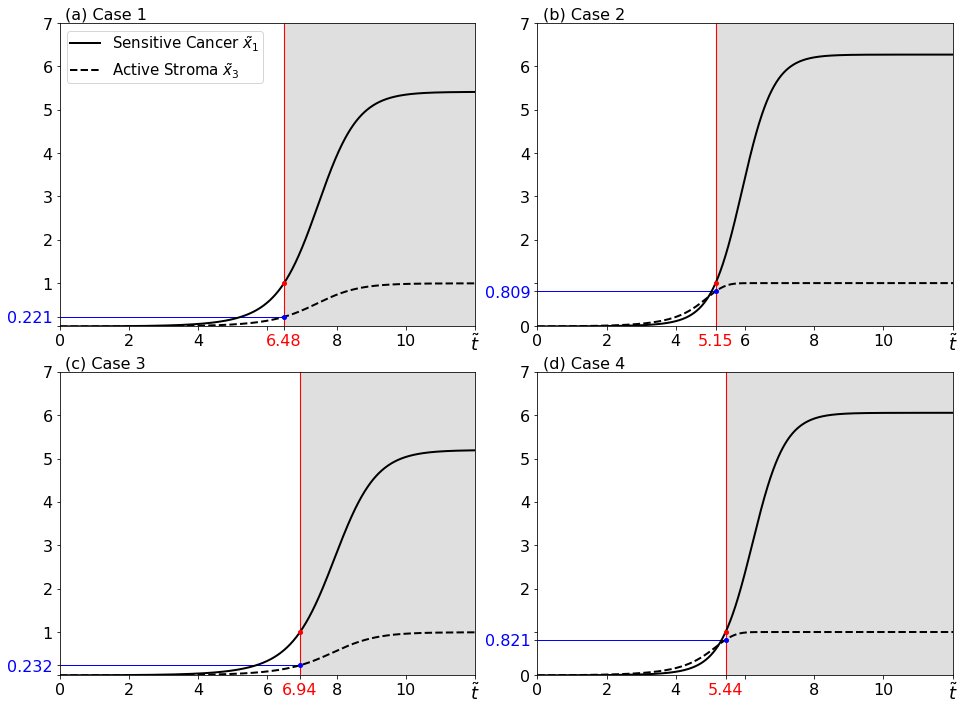

In [6]:
fig, axs = plt.subplots(2,2,figsize=(16,12))



axs[0,0].plot(ts, x1_00,'k-',linewidth=2,label=r'Sensitive Cancer $\tilde{x}_1$')
axs[0,0].plot(ts, x3_00,'k--',linewidth=2,label=r'Active Stroma $\tilde{x}_3$')

axs[0,1].plot(ts, x1_01,'k-',linewidth=2,label=r'Sensitive Cancer $\tilde{x}_1$')
axs[0,1].plot(ts, x3_01,'k--',linewidth=2,label=r'Active Stroma $\tilde{x}_3$')

axs[1,0].plot(ts, x1_10,'k-',linewidth=2,label=r'Sensitive Cancer $\tilde{x}_1$')
axs[1,0].plot(ts, x3_10,'k--',linewidth=2,label=r'Active Stroma $\tilde{x}_3$')

axs[1,1].plot(ts, x1_11,'k-',linewidth=2,label=r'Sensitive Cancer $\tilde{x}_1$')
axs[1,1].plot(ts, x3_11,'k--',linewidth=2,label=r'Active Stroma $\tilde{x}_3$')




for _ in [[0,0],[0,1],[1,0],[1,1]]:
    axs[_[0],_[1]].set_xlim(0,12)
    axs[_[0],_[1]].set_ylim(0,7)

    
    
axs[0,0].fill_between(np.array([0.0,6.479999999999906,6.479999999999906,12]),np.array([7.0,7.0,0.0,0.0]),7*np.ones(4),alpha=0.25,facecolor='grey',interpolate=True)
axs[0,1].fill_between(np.array([0.0,5.149999999999935,5.149999999999935,12]),np.array([7.0,7.0,0.0,0.0]),7*np.ones(4),alpha=0.25,facecolor='grey',interpolate=True)
axs[1,0].fill_between(np.array([0.0,6.9399999999998965,6.9399999999998965,12]),np.array([7.0,7.0,0.0,0.0]),7*np.ones(4),alpha=0.25,facecolor='grey',interpolate=True)
axs[1,1].fill_between(np.array([0.0,5.4399999999999284,5.4399999999999284,12]),np.array([7.0,7.0,0.0,0.0]),7*np.ones(4),alpha=0.25,facecolor='grey',interpolate=True)




axs[0,0].hlines(0.22098566177845577,0,6.479999999999906,'b', linewidth=1)    
axs[0,0].plot(6.479999999999906,0.22098566177845577,'bo',markersize=4)

axs[0,1].hlines(0.8091679141199833,0,5.149999999999935,'b', linewidth=1)    
axs[0,1].plot(5.149999999999935,0.8091679141199833,'bo',markersize=4)

axs[1,0].hlines(0.23151500470533065,0,6.9399999999998965,'b', linewidth=1)   
axs[1,0].plot(6.9399999999998965,0.23151500470533065,'bo',markersize=4)

axs[1,1].hlines(0.8214851274248937,0,5.4399999999999284,'b', linewidth=1)    
axs[1,1].plot(5.4399999999999284,0.8214851274248937,'bo',markersize=4)
    
    




axs[0,0].vlines(6.479999999999906,0,7,'r',linewidth=1.1)
axs[0,0].plot(6.479999999999906,1,'ro',markersize=4)

axs[0,1].vlines(5.149999999999935,0,7,'r',linewidth=1.1)
axs[0,1].plot(5.149999999999935,1,'ro',markersize=4)

axs[1,0].vlines(6.9399999999998965,0,7,'r',linewidth=1.1)
axs[1,0].plot(6.9399999999998965,1,'ro',markersize=4)

axs[1,1].vlines(5.4399999999999284,0,7,'r',linewidth=1.1)
axs[1,1].plot(5.4399999999999284,1,'ro',markersize=4)
    
    
    
    

axs[0,0].set_xticks([0,2,4,6,6.479999999999906,8,10,12])  
axs[0,0].set_xticklabels(['0','2','4','','6.48','8','10',r'$\tilde{t}$'],fontsize=16) 
axs[0,0].set_yticks([0,0.22098566177845577,1,2,3,4,5,6,7])
axs[0,0].set_yticklabels(['','0.221','1','2','3','4','5','6','7'],fontsize=16) 
axs[0,0].get_xticklabels()[-1].set_fontsize(18)
axs[0,0].get_xticklabels()[4].set_color('r')
axs[0,0].get_yticklabels()[1].set_color('b')

axs[0,1].set_xticks([0,2,4,5.149999999999935,6,8,10,12])  
axs[0,1].set_xticklabels(['0','2','4','5.15','6','8','10',r'$\tilde{t}$'],fontsize=16) 
axs[0,1].set_yticks([0,0.8091679141199833,1,2,3,4,5,6,7])
axs[0,1].set_yticklabels(['0','0.809','','2','3','4','5','6','7'],fontsize=16) 
axs[0,1].get_xticklabels()[-1].set_fontsize(18)
axs[0,1].get_xticklabels()[3].set_color('r')
axs[0,1].get_yticklabels()[1].set_color('b')

axs[1,0].set_xticks([0,2,4,6,6.9399999999998965,8,10,12])  
axs[1,0].set_xticklabels(['0','2','4','6','6.94','8','10',r'$\tilde{t}$'],fontsize=16) 
axs[1,0].set_yticks([0,0.23151500470533065,1,2,3,4,5,6,7])
axs[1,0].set_yticklabels(['','0.232','1','2','3','4','5','6','7'],fontsize=16) 
axs[1,0].get_xticklabels()[-1].set_fontsize(18)
axs[1,0].get_xticklabels()[4].set_color('r')
axs[1,0].get_yticklabels()[1].set_color('b')

axs[1,1].set_xticks([0,2,4,5.4399999999999284,6,8,10,12])  
axs[1,1].set_xticklabels(['0','2','4','5.44','','8','10',r'$\tilde{t}$'],fontsize=16) 
axs[1,1].set_yticks([0,0.8214851274248937,1,2,3,4,5,6,7])
axs[1,1].set_yticklabels(['0','0.821','','2','3','4','5','6','7'],fontsize=16) 
axs[1,1].get_xticklabels()[-1].set_fontsize(18)
axs[1,1].get_xticklabels()[3].set_color('r')
axs[1,1].get_yticklabels()[1].set_color('b')
    
    
    
axs[0,0].text(0.15,7.1,'(a) Case 1',fontsize=16) 
axs[0,1].text(0.15,7.1,'(b) Case 2',fontsize=16) 
axs[1,0].text(0.15,7.1,'(c) Case 3',fontsize=16) 
axs[1,1].text(0.15,7.1,'(d) Case 4',fontsize=16) 
    
    

    
axs[0,0].legend(fontsize='15',loc='upper left',borderpad=0.2)    
    
    
    
    
plt.subplots_adjust(hspace=0.15,wspace=0.15)
